In [5]:
class Node:
    def __init__(self, val, neighbors = [], visited = False):
        self.val= val
        self.neighbors = neighbors
        self.visited = visited
        
    def add_neighbors(self, neighbor_node):
        self.neighbors.append(neighbor_node)
        
    def get_neighbors(self):
        return self.neighbors
    
    def get_val(self):
        return self.val
    
    def is_visited(self):
        return self.visited
    
    def visit(self):
        self.visited = True

# Route Between Nodes

Given a directed graph, design an algorithm to find out whether there is a route between two nodes.

__Hints:#127__

In [6]:
def dfs_visit(current, goal):
    found_goal = current == goal
    current.visit()
    for neighbor in current.get_neighbors():
        if not neighbor.is_visited():
            found_goal = found_goal or dfs_visit(neighbor, goal)
    return found_goal

def find_route(start, end):
    return dfs_visit(start, end)

A = Node(1)
B = Node(2)
C = Node(3)
D = Node(4)
E = Node(5)
F = Node(6)
A.add_neighbors(B)
A.add_neighbors(D)
B.add_neighbors(C)
B.add_neighbors(E)
C.add_neighbors(E)
C.add_neighbors(D)
D.add_neighbors(F)
F.add_neighbors(E)
find_route(C, A)

False

# Minimal Tree

Given a sorted (increasing order) array with unique integer elements, write an algorithm to create a binary search tree with minimal height.

__Hints: #79, #73, #7 76__

In [7]:
class BNode:
    def __init__(self, val, left = None, right = None, parent = None, num_elems = 0):
        self.val = val
        self.left = left
        self.right = right
        self.parent = parent
        self.num_elems = num_elems
        
    def get_val(self):
        return self.val
    
    def get_left(self):
        return self.left
    
    def get_right(self):
        return self.right
    
    def set_left(self, left):
        self.left = left
        
    def set_right(self, right):
        self.right = right
        
    def set_parent(self, parent):
        self.parent = parent
        
    def get_parent(self):
        return self.parent
    
    def increase_elems(self):
        self.num_elems += 1
    
    def get_elems(self):
        return self.num_elems
        
class BTree:
    def __init__(self, head):
        self.head = head
        self.head.increase_elems()
        
    def get_root(self):
        return self.head
        
    def insert(self, val):
        def insert_helper(current_node, val):
            if not current_node:
                return BNode(val)
            elif current_node.get_val() <= val:
                current_node.right = insert_helper(current_node.right, val)
                current_node.right.increase_elems()
                return current_node
            else:
                current_node.left = insert_helper(current_node.left, val)
                current_node.left.increase_elems()
                return current_node
        
        self.head = insert_helper(self.head, val)
        self.head.increase_elems()
        
    def get_height(self):
        def get_height_helper(node):
            if not node:
                return 0
            else:
                return 1 + max(get_height_helper(node.left), get_height_helper(node.right))
        return get_height_helper(self.get_root())
        
    def __str__(self):
        def str_helper(current_node):
            if current_node:
                return f'{str_helper(current_node.left)}-{current_node.get_val()}-{str_helper(current_node.right)}'
            else:
                return ''
        return str_helper(self.head)
    
tree = BTree(BNode(4))
tree.insert(2)
tree.insert(6)
tree.insert(1)
tree.insert(3)
tree.insert(5)
tree.insert(7)
print(tree)
print(tree.get_root().num_elems)

def minimal_tree(sorted_arr):
    def minimal_tree_helper(sorted_arr, start, end):
        if start > end:
            return None
        else:
            return BNode(sorted_arr[(start + end)//2], 
                         minimal_tree_helper(sorted_arr, start, ((start+end)//2) - 1),
                         minimal_tree_helper(sorted_arr, ((start+end)//2) + 1, end))
    return minimal_tree_helper(sorted_arr, 0, len(sorted_arr) - 1)

print(BTree(minimal_tree([1, 2, 3, 4, 5, 6, 7])).get_height())

-1--2--3--4--5--6--7-
7
3


# List of Depths

Given a binary tree, design an algorithm which creates a linked list of all the nodes at each depth (e.g., if you have a tree with depth D, you'll have D linked lists).

__Hints: #107, #123, #135__

In [8]:
class LNode:
    def __init__(self, val, next_ptr = None, prev_ptr = None):
        self.val = val
        self.next_ptr = next_ptr
        self.prev_ptr = prev_ptr
    
    def get_val(self):
        return self.val
    
    def get_next(self):
        return self.next_ptr
    
    def get_prev(self):
        return self.prev_ptr
    
    def set_val(self, val):
        self.val = val
        
    def set_next(self, next_ptr):
        self.next_ptr = next_ptr
        
    def set_prev(self, prev_ptr):
        self.prev_ptr = prev_ptr
        
    
        
        
def ListOfDepths(btree):
    ListOfLinkedList = [0] * btree.get_height()
    root = btree.get_root()
    def helper(current_node, height, ListOfLinkedList):
        if current_node:
            if not ListOfLinkedList[height]:
                ListOfLinkedList[height] = LNode(current_node.get_val())
            else:
                L_node = ListOfLinkedList[height]
                ListOfLinkedList[height] = LNode(current_node.get_val())
                ListOfLinkedList[height].set_next(L_node)
            helper(current_node.get_right(), height+1, ListOfLinkedList)
            helper(current_node.get_left(), height+1, ListOfLinkedList)
    helper(root, 0, ListOfLinkedList)
    return ListOfLinkedList

print(tree)
ListOfDepths(tree)[1].get_next().get_val()

-1--2--3--4--5--6--7-


6

# Check Balanced

Implement a function to check if a binary tree is balanced. For the purposes of this question, a balanced tree is defined to be a tree such that the heights of the two subtrees of any node never differ by more than one.

__Hints:#27, #33, #49, #705, #724__

In [9]:
def isBalanced(root):
    def isBalancedHealper(current_node):
        if not current_node:
            return True, 0
        else:
            leftBalanced, leftHeight = isBalancedHealper(current_node.get_left())
            rightBalanced, rightHeight = isBalancedHealper(current_node.get_right())
            return leftBalanced and rightBalanced and abs(leftHeight - rightHeight) < 2, 1 + max(leftHeight, rightHeight)
    return isBalancedHealper(root)[0]

myTree = BTree(BNode(1))
myTree.insert(2)
myTree.insert(0)
myTree.insert(3)
myTree.insert(0.5)
myTree.insert(4)
print(isBalanced(myTree.get_root()))

False


# Validate BST

Implement a function to check if a binary tree is a binary search tree.

__Hints: #35, #57, #86, #113, #128__

In [10]:
from numpy import inf

def validate_bst(root):
    def validate_bst_helper(current_node):
        if not current_node:
            return (True, inf, -inf)
        else:
            lBalanced, lmin, lmax = validate_bst_helper(current_node.get_left())
            rBalanced, rmin, rmax = validate_bst_helper(current_node.get_right())
            return lBalanced and (lmax < current_node.get_val() <= rmin) and rBalanced, min(lmin, rmin, current_node.get_val()), max(lmax, rmax, current_node.get_val())
    return isBalanced_helper(root)[0]

print(validate_bst(tree.get_root()))
A = BNode(5, BNode(3, BNode(1), BNode(3.5)), BNode(7, BNode(6), BNode(9)))
print(validate_bst(A))
B = BNode(4, BNode(2, BNode(1), BNode(3)), BNode(5, None, BNode(7, BNode(6), None)))
C = BNode(13, BNode(11, None, BNode(12)), BNode(14))
D = BNode(10, B, C)
print(validate_bst(D))

NameError: name 'isBalanced_helper' is not defined

# Successor

Write an algorithm to find the "next" node (i.e., in-order successor) of a given node in a binary search tree. You may assume that each node has a link to its parent.

__Hints: #79, #91__

In [ ]:
def successor(root):
    def leftMostChild(root):
        if not root:
            return None
        else:
            if not root.get_left():
                return root
            else:
                return leftMostChild(root.get_left())
    def successorHelper(currentNode):
        if not currentNode:
            return None
        else:
            if not currentNode.get_right():
                if not currentNode.get_parent():
                    return None
                else:
                    parent = currentNode.get_parent()
                    while parent and parent.get_left() != currentNode:
                        currentNode = parent
                        parent = parent.get_parent()
                    return parent
            else:
                return leftMostChild(currentNode.get_right())
            
    return successorHelper(root)

a, b, c, d, e, f, g, h, i, j = BNode(1), BNode(2), BNode(3), BNode(4), BNode(5), BNode(6), BNode(7), BNode(8), BNode(9), BNode(10)
k, l, m, n, o, p = BNode(11), BNode(12), BNode(13), BNode(14), BNode(15), BNode(16)
root = h
root.set_left(d)
d.set_parent(h)
root.set_right(l)
l.set_parent(h)
d.set_left(a)
a.set_parent(d)
a.set_right(b)
b.set_parent(a)



print(BTree(root))    
successor(a).get_val()

# Build Order

You are given a list of projects and a list of dependencies (which is a list of pairs of projects, where the second project is dependent on the first project). All of a project's dependencies must be built before the project is. Find a build order that will allow the projects to be built. If there is no valid build order, return an error.

__EXAMPLE__

Input:

projects: a, b, c, d, e, f

dependencies: (a, d), (f, b), (b, d), (f, a), (d, c)

Output: f, e, a, b, d, c

__Hints: #26, #47, #60, #85, #725, #133__

In [ ]:
def get_neighbors(vertex, edges):
    return [dest for origin, dest in edges if vertex == origin]

def DFS_Visit(vertex, edges, vertex_info, timestep):
    vertex_info[vertex][0] = True
    vertex_info[vertex][1] = timestep
    timestep += 1
    for neighbor in get_neighbors(vertex, edges):
        if not vertex_info[neighbor][0]:
            timestep = DFS_Visit(neighbor, edges, vertex_info, timestep)
    vertex_info[vertex][-1] = timestep
    timestep += 1
    return timestep

def build_order(vertices, edges):
    vertex_info = {vertex: [False, 0, 0] for vertex in vertices}
    timestep = 0
    for vertex in vertices:
        if not vertex_info[vertex][0]:
            timestep = DFS_Visit(vertex, edges, vertex_info, timestep)
    sorted_vertices = sorted(vertex_info, key=lambda x: vertex_info[x][-1], reverse=True)
    return sorted_vertices

build_order('b,a,f,d,e,c'.split(','), [('a', 'd'), ('f', 'b'), ('b', 'd'), ('f', 'a'), ('d', 'c')])

# First Common Ancestor

Design an algorithm and write code to find the first common ancestor of two nodes in a binary tree. Avoid storing additional nodes in a data structure. NOTE: This is not necessarily a binary search tree.

__Hints: #70, #76, #28, #36, #46, #70, #80, #96__

In [11]:
def first_common_ancestor(root, a, b):
    def helper(current_node, a, b):
        if not current_node:
            return (False, False, None)
        else:
            a_present_left, b_present_left, left_node = helper(current_node.get_left(), a, b)
            a_present_right, b_present_right, right_node = helper(current_node.get_right(), a, b)
            if a_present_left and b_present_left:
                return (a_present_left, b_present_left, left_node)
            elif a_present_right and b_present_right:
                return (a_present_right, b_present_right, right_node)
            elif a_present_left and b_present_right:
                return True, True, current_node
            elif a_present_right and b_present_left:
                return True, True, current_node
            else:
                return a_present_left or a_present_right or current_node == a, b_present_left or b_present_right or current_node == b, current_node
    return helper(root, a, b)[-1]

myTree = BTree(BNode(10))
myTree.insert(5)
myTree.insert(15)
myTree.insert(0)
myTree.insert(20)
myTree.insert(25)
myTree.insert(22)
myTree.insert(7)
myTree.insert(6)
myTree.insert(5.5)
myTree.insert(9)
myTree.insert(8)
myTree.insert(9.5)
myTree.insert(8.5)
myTree.insert(-1)
myTree.insert(-2)
myTree.insert(-5)
myTree.insert(-4)
myTree.insert(11)
myTree.insert(12)
myTree.insert(10.5)
print(myTree)
x = myTree.get_root()
print(first_common_ancestor(x, 
                            x.get_right().get_left().get_left(), 
                            x.get_right().get_right().get_right().get_left()).get_val())

--5---4---2---1--0--5--5.5--6--7--8--8.5--9--9.5--10--10.5--11--12--15--20--22--25-
15


# BST Sequences

A binary search tree was created by traversing through an array from left to right and inserting each element. Given a binary search tree with distinct elements, print all possible arrays that could have led to this tree.

__EXAMPLE__

Input:
Output: {2, 1, 3}, {2, 3, 1}

__Hints: #39, #48, #66, #82__

In [40]:
def merge_two_arrs(arr_1, arr_2):
    if not arr_2:
        return [(arr_1, -1)]
    else:
        current_elem = arr_2[-1]
        merged_arrs = merge_two_arrs(arr_1, arr_2[:-1])
        return_ls = []
        for arr, index in merged_arrs:
            for i in range(len(arr), index, -1):
                return_ls.append(((arr[:i] + [current_elem] + arr[i:]), i))
        return return_ls
    
def clear_merged_arr(merged_arr):
    return [x for x, y in merged_arr]
    
clear_merged_arr(merge_two_arrs([], [1]))

[[1]]

In [53]:
def bst_sequence(root):
    def helper(current_node):
        if not current_node:
            return []
        else:
            l_list = helper(current_node.get_left())
            r_list = helper(current_node.get_right())
            ret_ls = []
            flag = False
            if l_list and r_list:
                for l in l_list:
                    for r in r_list:
                        ret_ls += clear_merged_arr(merge_two_arrs(l, r))
            elif l_list:
                for l in l_list:
                    ret_ls += clear_merged_arr(merge_two_arrs(l, []))
            elif r_list:
                for r in r_list:
                    ret_ls += clear_merged_arr(merge_two_arrs([], r))
            else:
                ret_ls.append([current_node.get_val()])
                flag = True
            
            if not flag:
                for index in range(len(ret_ls)):
                    ret_ls[index] = [current_node.get_val()] + ret_ls[index]
            return ret_ls
    return helper(root)

root = BNode(2, BNode(1, BNode(0), BNode(1.5)), BNode(3, BNode(2.5), BNode(4)))
len(bst_sequence(root))

80

In [13]:
def insert_in_all_places(order, elem):
    all_insertions = []
    for i in range(len(order) + 1):
        all_insertions.append(order[:i] + [elem] + order[i:])
    return all_insertions

def permutations(nodes_list):
    if len(nodes_list) == 1:
        return [[nodes_list[0]]]
    else:
        smaller_permutations = permutations(nodes_list[1:])
        all_permutations = []
        for smaller_permut in smaller_permutations:
            all_permutations += insert_in_all_places(smaller_permut, nodes_list[0])
        return all_permutations

def get_height(root):
    if not root:
        return 0
    else:
        return 1 + max(get_height(root.get_left()), get_height(root.get_right()))

def bst_sequence(root):
    myLs = [list() for i in range(get_height(root))]
    def insertInList(node, ls, height):
        if not node:
            return
        else:
            ls[height].append(node.get_val())
            insertInList(node.get_left(), ls, height+1)
            insertInList(node.get_right(), ls, height+1)
    insertInList(root, myLs, 0)
    final_ls = [myLs[0]]
    for nodes_list in myLs[1:]:
        all_permutations = permutations(nodes_list)
        new_list = list()
        for combined_perms in final_ls:
            for permutation in all_permutations:
                new_list.append(combined_perms + permutation)
        final_ls = list(new_list)

    return final_ls

myTree = BTree(BNode(0))
myTree.insert(-20)
myTree.insert(20)
myTree.insert(-40)
myTree.insert(40)
myTree.insert(-60)
myTree.insert(60)
print(myTree.get_root().get_right().get_right().get_right().get_elems())
#print(len(permutations([1, 2, 3, 4, 5, 6, 7, 8])))
len(bst_sequence(myTree.get_root()))

1


8

# Check Subtree

Tl and T2 are two very large binary trees, with Tl much bigger than T2. Create an algorithm to determine if T2 is a subtree of Tl. A tree T2 is a subtree of Tl if there exists a node n in Tl such that the subtree of n is identical to T2. That is, if you cut off the tree at node n, the two trees would be identical.

__Hints:#4, #11, #18, #31, #37__

In [14]:
def check_subtree(tree_1, tree_2):
    def check_equal(node_1, node_2):
        if not node_1:
            return node_1 == node_2
        else:
            return node_1.get_val() == node_2.get_val() and check_equal(node_1.get_left(), node_2.get_left()) and check_equal(node_1.get_right(), node_2.get_right())
    
    def check_helper(tree_1_node, tree_2_root):
        if not tree_1_node:
            return False
        else:
            contains = False
            if tree_1_node.get_val() == tree_2_root.get_val():
                contains = check_equal(tree_1_node, tree_2_root)
            return contains or check_helper(tree_1_node.get_left(), tree_2_root) or check_helper(tree_1_node.get_right(), tree_2_root)
    return check_helper(tree_1.get_root(), tree_2.get_root())

# Random Node

You are implementing a binary tree class from scratch which, in addition to insert, find, and delete, has a method getRandomNode() which returns a random node from the tree. All nodes should be equally likely to be chosen. Design and implement an algorithm for getRandomNode, and explain how you would implement the rest of the methods

__Hints: #42, #54, #62, #75, #89, #99, #112, #119__

{60: 1461, 0: 1360, -60: 1510, -40: 1447, 20: 1389, 40: 1419, -20: 1414}


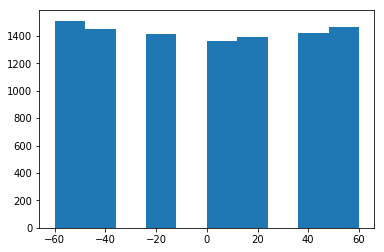

In [15]:
from random import random
#print(random())

def selectRandomNode(root):
    def helper(current_node):
        total_elems = current_node.num_elems
        random_num = random()
        if random_num < 1/total_elems:
            return current_node
        elif current_node.get_left() and current_node.get_right():
            select_random_num = random()
            if random_num < (current_node.get_left().get_elems() + 1)/total_elems:
                return helper(current_node.get_left())
            else:
                return helper(current_node.get_right())
        elif current_node.get_left():
            return helper(current_node.get_left())
        else:
            return helper(current_node.get_right())
        
    return helper(root)

my_dict = {}
hist_list = []
for _ in range(10000):
    elem = selectRandomNode(myTree.get_root()).get_val()
    hist_list.append(elem)
    if elem in my_dict:
        my_dict[elem] += 1
    else:
        my_dict[elem] = 1

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(hist_list)
print(my_dict)

# Paths with Sum

You are given a binary tree in which each node contains an integer value (which might be positive or negative). Design an algorithm to count the number of paths that sum to a given value. The path does not need to start or end at the root or a leaf, but it must go downwards (traveling only from parent nodes to child nodes).

__Hints:#6, #14, #52, #68, #77, #87, #94, #103, #108, #115__

In [16]:
def paths_with_sum(root, target):
    my_data_struct = []
    def helper(current_node):
        if not current_node:
            return [], 0
        else:
            sum_l, l_ways = helper(current_node.get_left())
            sum_r, r_ways = helper(current_node.get_right())
            total = sum_l + sum_r + [0]
            total_ways = l_ways + r_ways
            for index in range(len(total)):
                total[index] += current_node.get_val()
                if total[index] == target:
                    total_ways += 1
            return total, total_ways
        
    return helper(root)[-1]

myTree = BTree(BNode(0))
myTree.insert(0)
myTree.insert(0)
myTree.insert(0)
paths_with_sum(myTree.get_root(), 0)

10